<a href="https://colab.research.google.com/github/nxxk23/PROJECT/blob/main/PrescriptionFile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cut Kidney-Replacement Data**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
hemo = pd.read_csv('/content/drive/MyDrive/Thesis Project Kidney/Hemodialysis.csv', encoding='latin1')
hemo.head()

,PatientUID,PatientvisitUID,ENTY,OrderDttm,ItemName
0,1634972,1838715,InPatient,38:00.0,ãªéäµà·ÕÂÁ (Hemodialysis) - Chronic Hemodialy...
1,1681750,1838753,InPatient,16:00.0,ãªéäµà·ÕÂÁ (Hemodialysis) - Chronic Hemodialy...
2,1681750,1838753,InPatient,22:00.0,ãªéäµà·ÕÂÁ (Hemodialysis) - Chronic Hemodialy...
3,1681750,1838753,InPatient,23:00.0,ãªéäµà·ÕÂÁ (Hemodialysis) - Chronic Hemodialy...
4,1681750,1838753,InPatient,44:00.0,ãªéäµà·ÕÂÁ (Hemodialysis) - Chronic Hemodialy...


In [3]:
import pandas as pd
lab = pd.read_csv('/content/drive/MyDrive/Thesis Project Kidney/Lab.csv')
lab.shape

(21641523, 11)

In [4]:
# Create a list from hemo['PatientUID']
patient_uid_list = hemo['PatientUID'].unique().tolist()

In [5]:
import pandas as pd
prescription = pd.read_csv('/content/drive/MyDrive/Thesis Project Kidney/Prescription.csv')
prescription.shape

(9530452, 10)

In [6]:
# Remove patient UIDs from visit['PatientUID'] that are not in the list
prescription = prescription[~prescription['PatientUID'].isin(patient_uid_list)]
prescription.shape

(7845039, 10)

In [7]:
# Remove patient UIDs from lab['PatientUID'] that are not in the list
lab = lab[~lab['PatientUID'].isin(patient_uid_list)]
lab.shape

(17728574, 11)

> **ตัดผู้ป่วยโรคไตออกแล้ว**



#  **📁Presecription**

In [8]:
df = pd.DataFrame(prescription)
df

,PatientUID,PatientVisitUID,DispensedDttm,DrugName,GenericName,Quantity,DrugFrequency,Dosage,DosageForm,DrugDuration
0,2299,2024049,2558-02-19 14:48:15.693,Folic Acid 5 mg TAB,Folivit tab 5 mg,90.0,od pc |วันละ 1 ครั้ง หลังอาหารเช้า,1.0,1 TAB,90.0
1,2299,2024049,2558-02-19 14:48:15.693,Vitamin B Complex TAB,Vitamin B Complex TAB,180.0,bid pc |วันละ 2 ครั้ง หลังอาหารเช้า เย็น,1.0,1 TAB,90.0
2,2299,2024049,2558-02-19 14:48:15.693,losartan(Loranta) 50 mg TAB,Loranta film-coated tab 50 mg,90.0,od pc |วันละ 1 ครั้ง หลังอาหารเช้า,1.0,1 TAB,90.0
3,2299,2024049,2558-02-19 14:48:15.693,lorazepam(Anxira) 0.5 mg TAB,Anxira tab 0.5 mg,30.0,hs |วันละ 1 ครั้ง ก่อนนอน,1.0,1 TAB,30.0
4,2299,2024049,2558-02-19 14:47:55.953,ChalkTAB-1.5 TAB,Chalktab 1500 mg,90.0,od pc |วันละ 1 ครั้ง หลังอาหารเช้า,1.0,1 TAB,90.0
...,...,...,...,...,...,...,...,...,...,...
9530447,3437526,10191122,2565-12-27 03:00:00.563,Infusion plabottle set (IV.set),NaN,2.0,NaN,NaN,NaN,1.0
9530448,3437526,10191122,2565-12-27 03:00:00.563,Normal Saline 0.9% IV 1000 ml,Normal Saline 0.9% IV 1000 ml,1.0,As Direct |ใช้ตามแพทย์สั่ง,NaN,0 ml,1.0
9530449,3437526,10191122,2565-12-27 03:00:00.563,Normal Saline 0.9% IV 100 ml,Normal Saline 0.9% IV 100 ml,2.0,As Direct |ใช้ตามแพทย์สั่ง,NaN,0 ml,1.0
9530450,3437526,10191122,NaN,Minimun Volume Extension with T connector,NaN,1.0,NaN,NaN,NaN,1.0


## **List Description**
```
- **drugCol1 / genericCol1** == list of lower case
- **drugCol2 / genericCol2** == store value not start with digits
- **drugdigits / genericdigits** == store value start with digits
- **drugCol3 / genericCol3** == clean unit from lab.csv
- **drugCol4 / genericCol4** == clean words to remove from wordcloud
- **cleaned_drugdigits / cleaned_genericdigits** == clean word that start with digit
```

In [9]:
import pandas as pd
import re

# Lowercase and store values from 'DrugName' column
drugCol1 = [str(i).lower() for i in df['DrugName']]

# Lowercase and store values from 'GenericName' column
genericCol1 = [str(i).lower() for i in df['GenericName']]

# Store drug names
drugCol2 = []
genericCol2 = []
drugdigits = []
genericdigits = []

# Process 'DrugName' column
for value in drugCol1:
    if isinstance(value, str):
        if value[0].isdigit():
            # Store the value starting with digits in drugdigits list
            drugdigits.append(value)
            # Remove the dose quantity and store in drugCol2 list
            newval = re.sub(r'\b\d+(\.\d+)?\s*[a-zA-Z]+\s*', '', value)
            drugCol2.append(newval)
        else:
            valList = value.split()
            index_begin_with_digit = len(valList)
            for i in range(len(valList)):
                if valList[i][0].isdigit():
                    index_begin_with_digit = i
                    break
            newval = " ".join(valList[:index_begin_with_digit])
            drugCol2.append(newval)


# Process 'GenericName' column
for value in genericCol1:
    if isinstance(value, str):
        if value[0].isdigit():
            # Store the value starting with digits in genericdigits list
            genericdigits.append(value)
            # Remove the dose quantity and store in newval list
            newval = re.sub(r'\b\d+(\.\d+)?\s*[a-zA-Z]+\s*', '', value)
            genericCol2.append(newval)
        else:
            valList = value.split()
            index_begin_with_digit = len(valList)
            for i in range(len(valList)):
                if valList[i][0].isdigit():
                    index_begin_with_digit = i
                    break
            newval = " ".join(valList[:index_begin_with_digit])
            genericCol2.append(newval)

## **Remove Unit words from lab.csv**

In [10]:
# Define the unit_unique_list containing words to be removed
unit_unique_list = lab['Unit'].unique().tolist()

# Function to remove words from a list of strings
def remove_words_from_list(input_list, words_to_remove):
    result_list = []
    for item in input_list:
        # Check if the item is a string or convert to string if it's not
        if not isinstance(item, str):
            item = str(item)

        # Split the item into words and remove the words in words_to_remove
        words = item.split()
        words = [word for word in words if word not in words_to_remove]
        result_list.append(" ".join(words))
    return result_list

# Process 'drugCol2' and 'genericCol2'
drugCol3 = remove_words_from_list(drugCol2, unit_unique_list)
genericCol3 = remove_words_from_list(genericCol2, unit_unique_list)


### **Frequently Words**

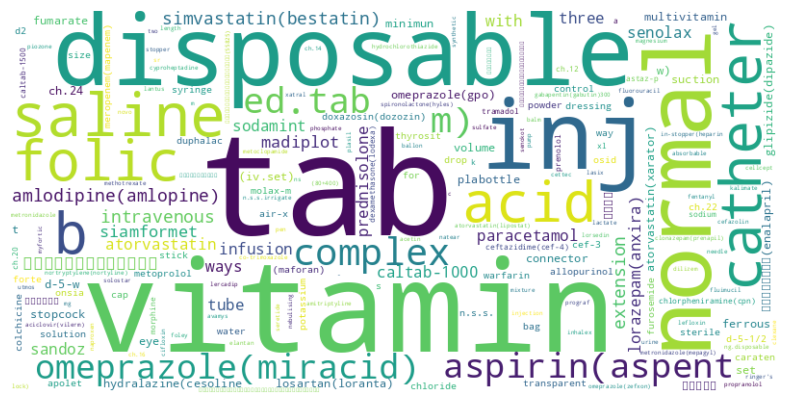

In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# Assuming you have already processed genericCol2 and stored the result in genericCol3

# Split the genericCol3 elements by spaces and flatten the list
flattened_words = " ".join(drugCol3).split()

# Count the occurrences of each word
word_counter = Counter(flattened_words)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counter)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


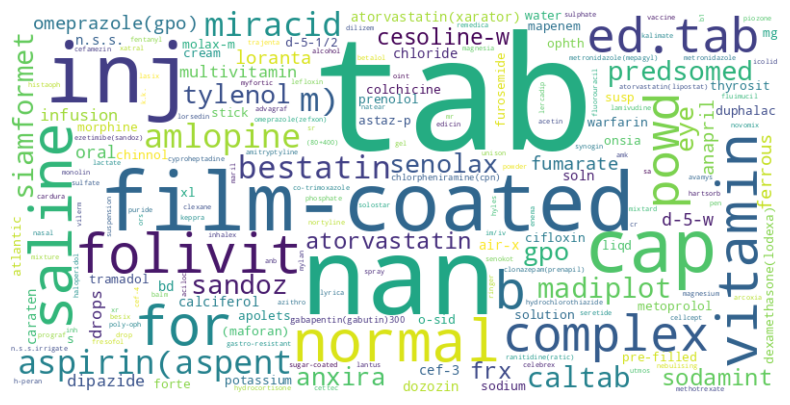

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# Assuming you have already processed genericCol2 and stored the result in genericCol3

# Join the genericCol3 elements into one big string with space separator
text = " ".join(genericCol3)

# Count the occurrences of each word (case sensitive)
word_counter = Counter(text.split())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counter)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


> **clean เพิ่มเติม**



In [13]:
words_to_remove = ['ed.tab','m)','nan','inj', 'cap', 'mg', 'ml', 'tab',
                   '[7402]', '[5702]', '[5703]', '[0604]', '[5606]', '[024840]',
                   '[napha]', '[5704]', '(ฝาก)', '(เลิกใช้)','ch.22','[024840]',
                   '[0604]','[5606]','[5702]','[5703]''[5704]','[7402]','tab(ฝาก)']

In [14]:
drugCol4 = []
for i in drugCol3:
    for word in words_to_remove:
        i = i.replace(word, "")
    i = re.sub(r'\bno\.\d+(\.\d+)?\b', '', i)
    drugCol4.append(i)

In [15]:
set(drugCol4)

{'intravenous disposable catheter ch.18 ความยาวประมาณ',
 'เกลือผงสำหรับผสมล้างทำความสะอาดโพรงจมูกสูตรอ่อนโยน isotonic (gentle) ขนาด',
 'omeprazole(zefxon)',
 'cellcept ',
 'synthetic absorbable ชนิดมียาฆ่าเชื้อ ( anti-bacteria)',
 'สายสวนเพื่อการขยายหลอดเลือดโคโรนารี่ด้วยขดลวดเคลือบยาต้านการตีบซ้ำ (drug-eluting stent) synergy dia.3.0x16mm.',
 'สายสวนเพื่อการขยายหลอดเลือดโคโรนารี่ด้วยขดลวดเคลือบยาต้านการตีบซ้ำ (drug-eluting stent) synergy dia.3.0x48mm.',
 'ethyl alcohol absolute ar.',
 'coal tar shampoo',
 'pta balloon dilatation catheter monorail size',
 'สายคล้องแขนกันไหล่หลุด bobaht sling no. s (excellance)',
 'adhesive incise drape size',
 'เข็มเจาะดูดเนื้อเยื้อผ่านกล้องส่องตรวจชนิดอัลตราซาวด์ เข็ม endoscopic u/s guide fna (19g)',
 'mabthera ',
 'พลาสติกกันเท้าตก แบบไม่มีข้อขนาด l',
 'ข้อเข่าชนิดที่ส่วนรับน้ำหนักสามารถเคลื่อนไหวได้ oxford twin peg',
 'พลาสติกดามข้อไหล่ กลาง (ultrasling ',
 'octreotide ',
 'buscopan',
 'irrigation / aspiration tip',
 'plaquenil(hy.chloroquin)',
 'peg

In [16]:
genericCol4 = []
for i in genericCol3:
    for word in words_to_remove:
        i = i.replace(word, "")
    i = re.sub(r'\bno\.\d+(\.\d+)?\b', '', i)
    genericCol4.append(i)

In [17]:
# Remove the dose from values in the drugdigits list
cleaned_drugdigits = []
for value in drugdigits:
    cleaned_val = re.sub(r'(\s+\d+\s*mg|\s+\d+\s*%|inj\.?|tab\.?|\[.*?\]|\(.*?\)|\s+450\s*ml|0\.2ml)', '', value)
    cleaned_drugdigits.append(cleaned_val)

set(cleaned_drugdigits)

{'2% chlorhexidine in alcohol',
 '3tc  ',
 '3tc lamivudine ',
 '5-fu/  for subconjunctival'}

In [18]:
set(drugdigits)

{'2% chlorhexidine in 70% alcohol 450 ml',
 '3tc 150 mg tab [napha]',
 '3tc 300 mg tab [napha]',
 '3tc lamivudine 150 mg tab(ฝาก)',
 '5-fu 10mg/0.2ml inj. for subconjunctival'}

In [19]:
# Remove the dose from values in the drugdigits list
cleaned_genericdigits = []
for value in genericdigits:
    cleaned_val = re.sub(r'(\s+\d+\s*mg|\s+\d+\s*%|inj\.?|tab\.?|\[.*?\]|\(.*?\)|\s+450\s*ml|0\.2ml)', '', value)
    cleaned_genericdigits.append(cleaned_val)

set(cleaned_genericdigits)

{'2% chlorhexidine in alcohol 500 ml', '3tc  ', '5-fu/  for subconjunctival'}

## **รวมนับจำนวน**


In [20]:
len(genericCol4)

7845039

In [21]:
len(drugCol4)

7845039

In [22]:
len(cleaned_drugdigits)

11147

In [23]:
len(cleaned_genericdigits)

814

In [24]:
import pandas as pd
import re
from itertools import zip_longest

# Assuming you have already processed and filled the lists drugCol2, genericCol2, drugdigits, and genericdigits.

# Combine drugCol4 and genericCol4 into DataFrame table1
table1 = pd.DataFrame({'DrugName': drugCol4, 'GenericName': genericCol4})

# Combine cleaned_drugdigits and cleaned_genericdigits into DataFrame table2 with None as filler for different lengths
table2 = pd.DataFrame({'DrugName': [x for x in zip_longest(cleaned_drugdigits, cleaned_genericdigits, fillvalue='None')]})

# Concatenate table1 and table2 into df_combined
df_combined = pd.concat([table1, table2], ignore_index=True)

# Count unique values for 'DrugName'
drug_value_counts = df_combined['DrugName'].value_counts()

# Count unique values for 'GenericName'
generic_value_counts = df_combined['GenericName'].value_counts()

In [25]:
pre_drug = df_combined['DrugName'].value_counts().reset_index()
pre_drug.columns = ['DrugName', 'Count']

pre_generic = df_combined['GenericName'].value_counts().reset_index()
pre_generic.columns = ['GenericName', 'Count']

pre_count = df_combined.groupby(['DrugName', 'GenericName']).size().reset_index()
pre_count.columns = ['DrugName', 'GenericName', 'Count']

pre_df = pd.DataFrame(pre_count)

pre_df

,DrugName,GenericName,Count
0,,,720
1,,lamivir,268
2,2% chlorhexidine in 70% alcohol,2% chlorhexidine in 70% alcohol,31
3,5-fu /. for subconjunctival,5-fu /. for subconjunctival,19
4,a m k,amk,20716
...,...,...,...
4549,ไหมเย็บเนื้อเยื่อเข้ากับสมอยึดตรีงกระดูก(ultra...,,4
4550,ไหมเย็บแผล ชนิดเส้นเดี่ยว ไม่ละลายน้ำ ผลิตจากพ...,,1
4551,ไหมเย็บแผล ชนิดเส้นเดี่ยว ไม่ละลายน้ำ ผลิตจากโ...,,1
4552,ไหมเย็บแผล ชนิดเส้นเดี่ยว ไม่ละลายน้ำ ผลิตจากโ...,,1


In [26]:
pre_df['Count'].sum()

7845039

In [27]:
pre_df.to_excel('PresriptionFile.xlsx')